# I - Descriptive Analysis of the Dataset Using LDA

In this first notebook, we conduct a descriptive analysis of the dataset introduced in the paper *Learning Word Vectors for Sentiment Analysis* by Maas et al. (2011), in order to perform some preliminary checks and gain a better understanding of its structure.

To do this, we apply one of the techniques mentioned in the paper: **Latent Dirichlet Allocation (LDA)**. LDA is an unsupervised method that uncovers latent topics within a collection of documents. It assumes that each document is a mixture of several topics, and that each topic is characterized by a distribution over words.

LDA requires a bag-of-words representation of the documents. In our implementation, we choose **k = 10 topics**. To visualize the results, we use the `Wordcloud` package to display the most frequent words associated with each topic.

We observe that this method (at least with k = 10) appears fairly effective in identifying the types of movies being reviewed. However, only one dominant topic seems to capture the **tone intensity** of the reviews — and this topic tends to be associated with most of the documents in the dataset, which are highly opinionated. Crucially, this topic does **not** distinguish between positive and negative sentiment.

As a result, we recover one of the main conclusions of the paper by Maas et al. (2011): **LDA struggles to capture sentiment polarity**, and sentiment learning remains a challenging task for unsupervised topic modeling.

----

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_parquet("data/df_train.parquet")
df_test = pd.read_parquet("data/df_test.parquet")

/tmp/ipykernel_10783/3310039175.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_train, palette='viridis')


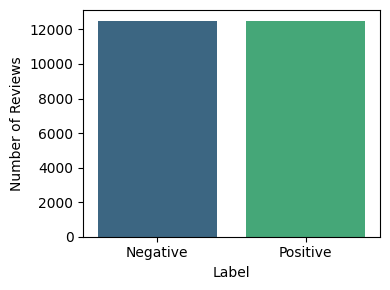

Average length of reviews (in words):
- Negative reviews (0): 230.87 words
- Positive reviews (1): 236.71 words


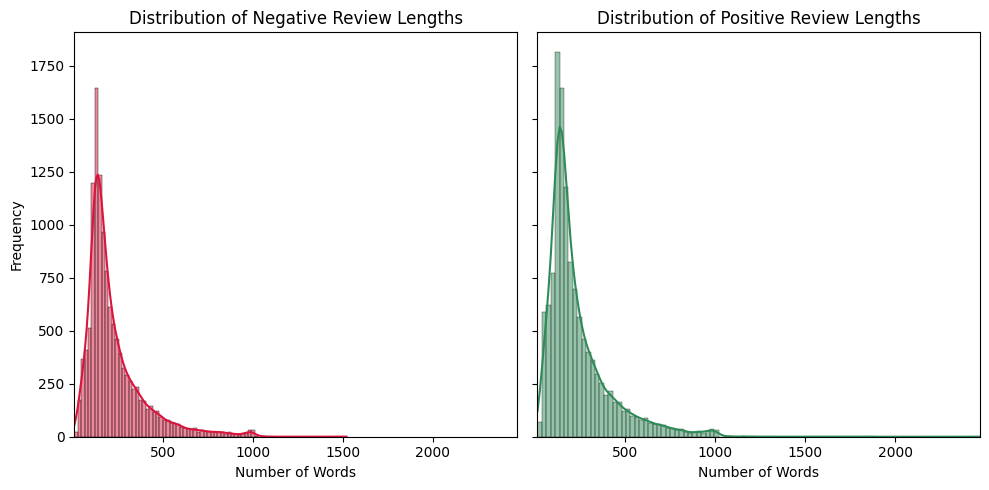

In [19]:
""" Some descriptive graphs to visualize de datasets """

#  Add a column with the number of words per review
df_train['nb_mots'] = df_train['texte'].apply(lambda x: len(x.split()))

# Histogram of positive and negative reviews
plt.figure(figsize=(4,3))
sns.countplot(x='label', data=df_train, palette='viridis')
plt.title("")
plt.xlabel("Label")
plt.ylabel("Number of Reviews")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.tight_layout()
plt.savefig('output/review_distribution.png')  # Save the figure
plt.show()

# Average length of reviews based on the label
longueurs_moyennes = df_train.groupby('label')['nb_mots'].mean()
print("Average length of reviews (in words):")
print(f"- Negative reviews (0): {longueurs_moyennes[0]:.2f} words")
print(f"- Positive reviews (1): {longueurs_moyennes[1]:.2f} words")

# Distribution of review lengths
df_neg = df_train[df_train['label'] == 0]
df_pos = df_train[df_train['label'] == 1]
x_min = min(df_train['nb_mots'])
x_max = max(df_train['nb_mots'])
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.histplot(data=df_neg, x='nb_mots', bins=80, kde=True, color='crimson', ax=axes[0])
axes[0].set_title("Distribution of Negative Review Lengths")
axes[0].set_xlabel("Number of Words")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(x_min, x_max)

sns.histplot(data=df_pos, x='nb_mots', bins=100, kde=True, color='seagreen', ax=axes[1])
axes[1].set_title("Distribution of Positive Review Lengths")
axes[1].set_xlabel("Number of Words")
axes[1].set_ylabel("")
axes[1].set_xlim(x_min, x_max)

plt.tight_layout()
plt.savefig('output/review_length_distribution.png')  # Save the figure
plt.show()


In [7]:
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

In [8]:
# Download NLTK resources if needed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Preprocess the texts
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Clean the tokens: remove stopwords, punctuation, and very short words
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation and len(t) > 2]
    return tokens

# Apply preprocessing to all reviews in the DataFrame
tokenized_reviews = df_train['texte'].apply(preprocess)

# Create dictionary and corpus
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# LDA Model
num_topics = 10
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Display the topics
for topic_id in range(num_topics):
    topic_words = lda_model.show_topic(topic_id)
    print(f"Topic #{topic_id + 1}:")
    print([word for word, _ in topic_words])
    print()

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Topic #1:
['film', 'one', 'story', 'character', 'films', 'also', 'characters', 'much', 'two', 'well']

Topic #2:
['musical', 'version', 'best', 'dance', 'role', 'great', 'cast', 'john', 'christmas', 'songs']

Topic #3:
['western', 'ford', 'caine', 'grant', 'che', 'stewart', 'luke', 'westerns', 'stooges', 'cowboy']

Topic #4:
['cage', 'wasting', 'derek', 'turkey', 'adam', 'jackson', 'burton', 'apes', 'ship', 'peter']

Topic #5:
['family', 'woman', 'father', 'wife', 'man', 'life', 'young', 'girl', 'mother', 'love']

Topic #6:
['show', 'episode', 'series', 'episodes', 'season', 'shows', 'television', 'funny', 'eddie', 'comedy']

Topic #7:
['movie', "n't", 'like', 'one', 'would', 'see', 'time', 'people', 'good', 'first']

Topic #8:
['movie', "n't", 'film', 'one', 'like', 'bad', 'good', 'even', 'really', 'would']

Topic #9:
['jane', 'rochester', 'davis', 'cinderella', 'tracy', 'madonna', 'eyre', 'bette', 'sutherland', 'davies']

Topic #10:
['allen', 'sean', 'match', 'james', 'woody', 'jim',

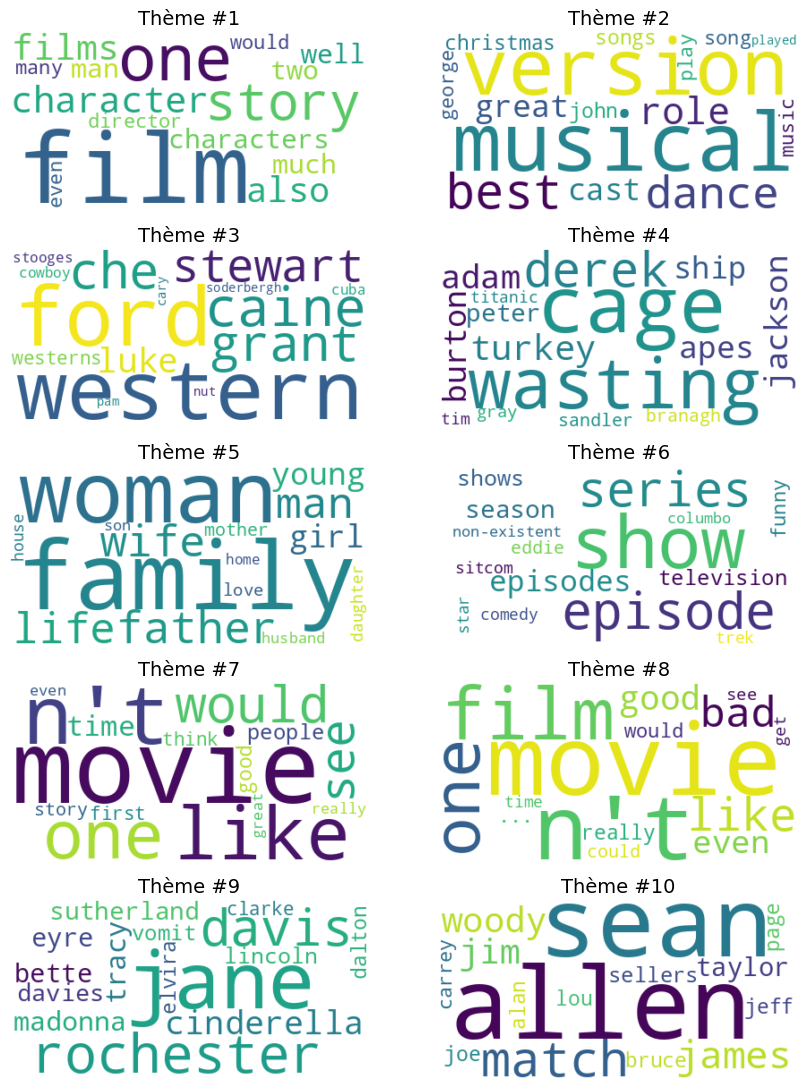

In [9]:
"""Créer un wordcloud par topic"""
from wordcloud import WordCloud
fig, axes = plt.subplots(5, 2, figsize=(9, 11))
axes = axes.flatten()

# Générer un wordcloud pour chaque topic
for i, topic_id in enumerate(range(num_topics)):
    topic_words = dict(lda_model.show_topic(topic_id, topn=15))  # top 30 mots
    wordcloud = WordCloud(background_color='white', colormap='viridis').generate_from_frequencies(topic_words)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"Thème #{topic_id + 1}", fontsize=14)
    axes[i].axis('off')

# Ajustement de la mise en page et sauvegarde
plt.tight_layout()
plt.savefig("output/lda_topics_wordcloud.png", dpi=300)
plt.show()

In [ ]:
"""Application to an example"""
new_text = "I really enjoyed this movie. The acting was great and the plot was engaging."
new_tokens = preprocess(new_text)
new_bow = dictionary.doc2bow(new_tokens)
new_topics = lda_model.get_document_topics(new_bow)

print("Inferred Topics:")
print(new_topics)

Inferred Topics:
[(0, 0.012523872), (1, 0.012514597), (2, 0.012512902), (3, 0.0125129325), (4, 0.01251303), (5, 0.01251302), (6, 0.012516554), (7, 0.88736725), (8, 0.012512902), (9, 0.0125129875)]


In [38]:
"""Plot the topic distribution for a single text using an LDA model"""

def plot_topic_distribution(text, lda_model, dictionary, output_path="output/topic_distribution.png"):

    # Preprocessing and vectorization
    tokens = preprocess(text)
    bow = dictionary.doc2bow(tokens)
    topics = lda_model.get_document_topics(bow)

    # Extract topic IDs and their probabilities
    topic_ids = [t[0] for t in topics]
    topic_probs = [t[1] for t in topics]

    # Ensure all topics are represented (even those with zero probability)
    full_probs = [0.0] * lda_model.num_topics
    for tid, prob in topics:
        full_probs[tid] = prob

    # Plotting the distribution
    plt.figure(figsize=(6, 4))
    plt.bar(range(1, lda_model.num_topics + 1), full_probs, color='skyblue')
    plt.xticks(range(1, lda_model.num_topics + 1))
    plt.ylim(0, 1)
    plt.xlabel("Topic distribution")
    plt.ylabel("Probability")
    plt.title(f"Text: “{text}”", fontsize=14)
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.show()


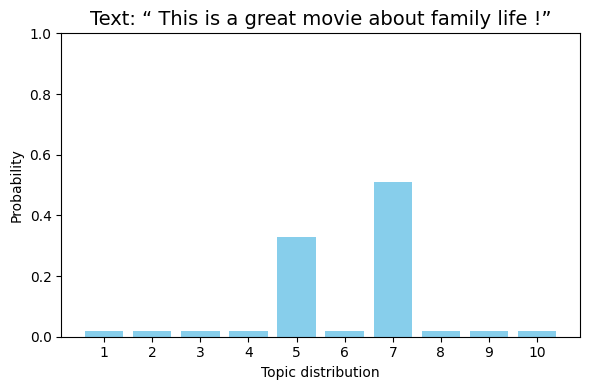

In [51]:
new_text = " This is a great movie about family life !"
plot_topic_distribution(new_text, lda_model, dictionary, output_path="output/lda_topic_distribution_test_great.png")

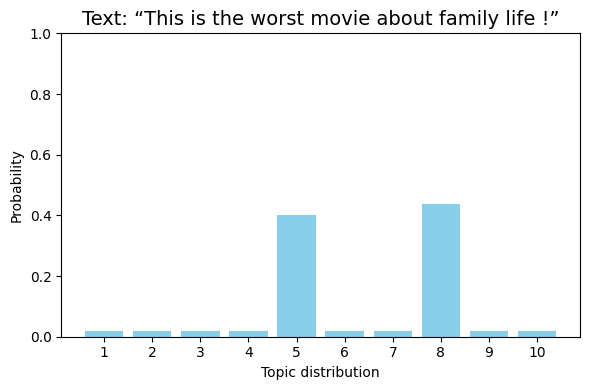

In [50]:
new_text = "This is the worst movie about family life !"
plot_topic_distribution(new_text, lda_model, dictionary, output_path="output/lda_topic_distribution_test_worst.png")

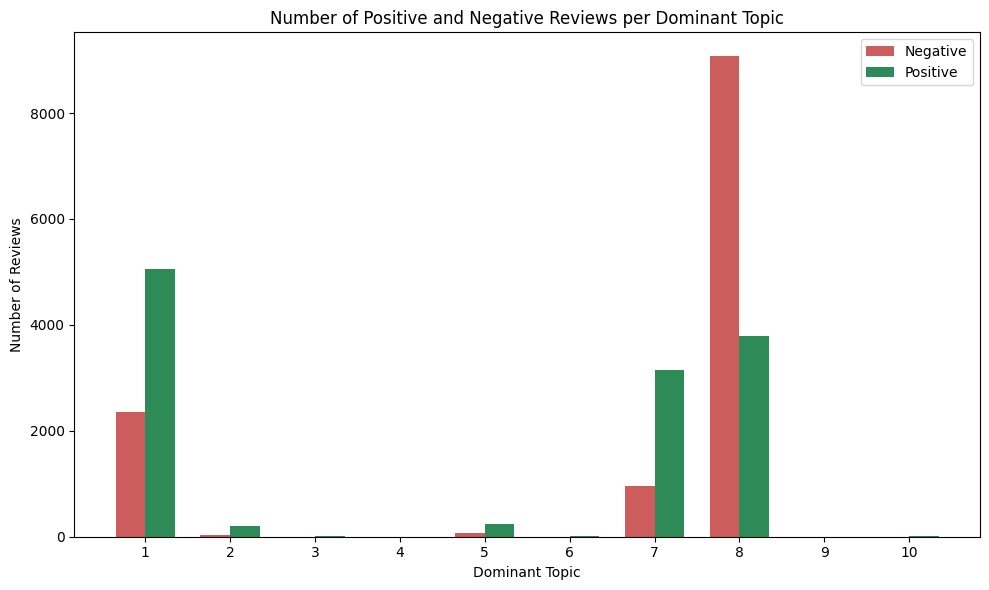

In [13]:
"""Plot the number of positive and negative reviews per dominant topic using LDA"""

# Initialize counters
topic_pos_counts = np.zeros(lda_model.num_topics)
topic_neg_counts = np.zeros(lda_model.num_topics)

# Identify the dominant topic for each review
for text, label in zip(df_train['texte'], df_train['label']):
    tokens = preprocess(text)
    bow = dictionary.doc2bow(tokens)
    topics = lda_model.get_document_topics(bow)
    
    if topics:
        dominant_topic = max(topics, key=lambda x: x[1])[0]
        if label == 1:
            topic_pos_counts[dominant_topic] += 1
        else:
            topic_neg_counts[dominant_topic] += 1

# Plotting
x = np.arange(1, lda_model.num_topics + 1)
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, topic_neg_counts, width, label='Negative', color='indianred')
plt.bar(x + width/2, topic_pos_counts, width, label='Positive', color='seagreen')
plt.xlabel("Dominant Topic")
plt.ylabel("Number of Reviews")
plt.title("Number of Positive and Negative Reviews per Dominant Topic")
plt.xticks(x)
plt.legend()
plt.tight_layout()
plt.savefig("output/nb_commentaires_par_theme.png", dpi=300)
plt.show()

In [15]:
"""Find maximal number of words in all texts"""
all_texts = pd.concat([df_train['texte'], df_test['texte']])

max_word_count = all_texts.apply(lambda x: len(str(x).split())).max()

print(f"Nombre maximal de mots dans un texte : {max_word_count}")

Nombre maximal de mots dans un texte : 2470
